## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

Synthetic Sensor Data:
            timestamp   sensor_1   sensor_2    sensor_3
0 2025-05-16 00:00:00  25.993428  45.855025  107.569886
1 2025-05-16 01:00:00  24.723471  47.199095   90.778347
2 2025-05-16 02:00:00  26.295377  53.736468  108.696059
3 2025-05-16 03:00:00  28.046060  53.051851  113.556379
4 2025-05-16 04:00:00  24.531693  49.895492  104.134349

Selected Features:
['sensor_1', 'sensor_2', 'sensor_3']

Anomaly counts:
anomaly_label
Normal     251
Anomaly     49
Name: count, dtype: int64

Anomaly Data Points:
              timestamp   sensor_1   sensor_2    sensor_3  anomaly  \
11  2025-05-16 11:00:00  34.068540  40.493884  129.444153       -1   
12  2025-05-16 12:00:00  35.483925  39.127082  132.799686       -1   
13  2025-05-16 13:00:00  21.173440  54.067548   88.745110       -1   
14  2025-05-16 14:00:00  21.550164  56.527394  124.457520       -1   
16  2025-05-16 16:00:00  32.974338  38.409765  131.093948       -1   
23  2025-05-16 23:00:00  22.150504  60.461936  113.4542

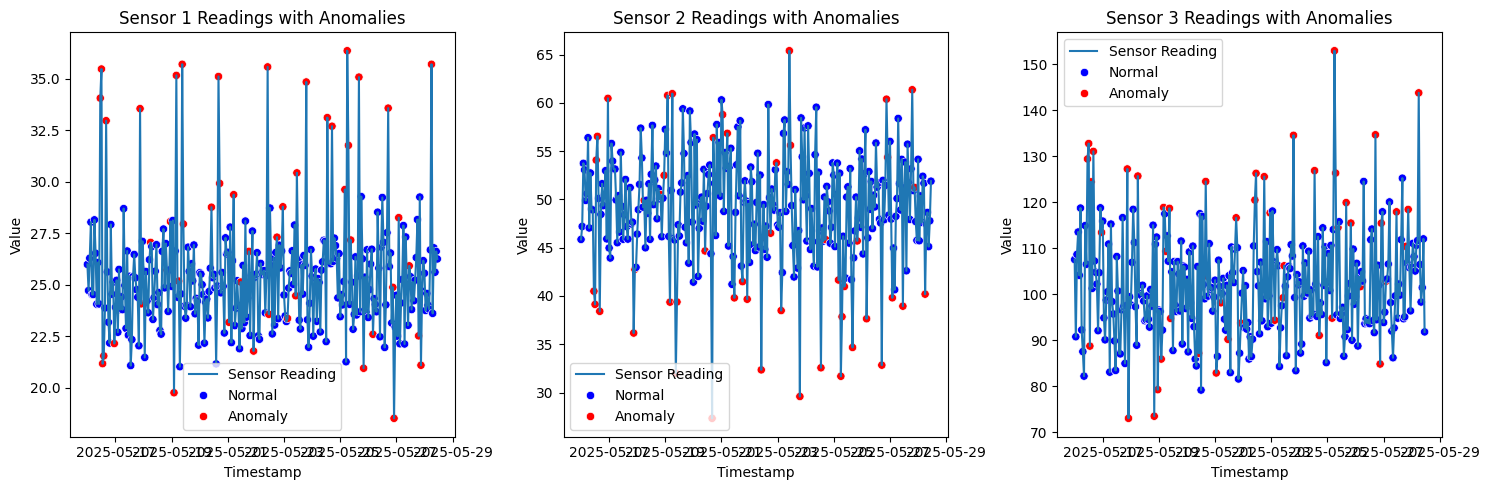

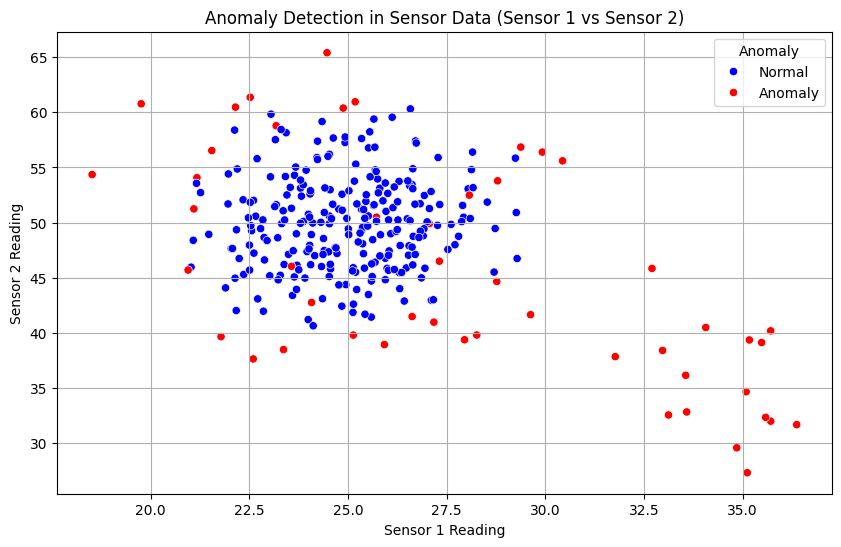

In [1]:
# Task: Anomaly Detection in Sensor Data
# Steps:
# 1. Load Dataset
# 2. Feature Selection
# 3. Isolation Forest Implementation
# 4. Plot Results

# 1. Load Dataset
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For demonstration, let's create synthetic sensor data
np.random.seed(42)
n_samples = 300
time = pd.to_datetime(pd.date_range('2025-05-16 00:00:00', periods=n_samples, freq='H'))
sensor_1 = np.random.normal(25, 2, n_samples)
sensor_2 = np.random.normal(50, 5, n_samples)
sensor_3 = np.random.normal(100, 10, n_samples)

# Introduce some anomalies
anomaly_indices = np.random.randint(0, n_samples, 15)
sensor_1[anomaly_indices] += 10
sensor_2[anomaly_indices] -= 15
sensor_3[anomaly_indices] += 30

df = pd.DataFrame({'timestamp': time, 'sensor_1': sensor_1, 'sensor_2': sensor_2, 'sensor_3': sensor_3})
print("Synthetic Sensor Data:")
print(df.head())

# 2. Feature Selection
# For this example, let's use all sensor readings as features
features = ['sensor_1', 'sensor_2', 'sensor_3']
X = df[features]
print("\nSelected Features:")
print(features)

# 3. Isolation Forest Implementation
# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)
df['anomaly'] = model.fit_predict(X)
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\nAnomaly counts:")
print(df['anomaly_label'].value_counts())
print("\nAnomaly Data Points:")
print(df[df['anomaly'] == -1])

# 4. Plot Results
# Visualize anomalies over time for each sensor
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.lineplot(x='timestamp', y=feature, data=df, label='Sensor Reading')
    sns.scatterplot(x='timestamp', y=feature, hue='anomaly_label', data=df, palette={'Normal': 'blue', 'Anomaly': 'red'})
    plt.title(f'Sensor {i+1} Readings with Anomalies')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot of two sensor readings with anomaly highlighting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sensor_1', y='sensor_2', hue='anomaly_label', data=df, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Anomaly Detection in Sensor Data (Sensor 1 vs Sensor 2)')
plt.xlabel('Sensor 1 Reading')
plt.ylabel('Sensor 2 Reading')
plt.legend(title='Anomaly')
plt.grid(True)
plt.show()